<a href="https://colab.research.google.com/github/saspav/Introduction_Competitive_Data_Science/blob/main/3_6_pos_tag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задача определения частей речи, Part-Of-Speech Tagger (POS)

Мы будем решать задачу определения частей речи (POS-теггинга).

In [1]:
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import brown
import matplotlib.pyplot as plt

Вам в помощь http://www.nltk.org/book/

Загрузим brown корпус

In [2]:
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

<b>Существует не одна система тегирования, поэтому будьте внимательны, когда прогнозируете тег слов в тексте и вычисляете качество прогноза. Можете получить несправедливо низкое качество вашего решения.

Cейчас будем использовать универсальную систему тегирования universal_tagset

In [3]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

<img src="https://4.bp.blogspot.com/-IcFli2wljs0/WrVCw3umY_I/AAAAAAAACYM/UJ_neoUAs3wF95dj2Ouf3BzxXzB_b2TbQCLcBGAs/s1600/postags.png">


Мы имеем массив предложений пар (слово-тег)

In [4]:
brown_tagged_sents = brown.tagged_sents(tagset="universal")
brown_tagged_sents

[[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')], [('The', 'DET'), ('jury', 'NOUN'), ('further', 'ADV'), ('said', 'VERB'), ('in', 'ADP'), ('term-end', 'NOUN'), ('presentments', 'NOUN'), ('that', 'ADP'), ('the', 'DET'), ('City', 'NOUN'), ('Executive', 'ADJ'), ('Committee', 'NOUN'), (',', '.'), ('which', 'DET'), ('had', 'VERB'), ('over-all', 'ADJ'), ('charge', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('election', 'NOUN'), (',', '.'), ('``', '.'), ('deserves', 'VERB'), ('the', 'DET'), ('praise', 'NOUN'), ('and', 'CONJ'), ('thanks', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('City

Первое предложение

In [5]:
brown_tagged_sents[0]

[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN'),
 ('said', 'VERB'),
 ('Friday', 'NOUN'),
 ('an', 'DET'),
 ('investigation', 'NOUN'),
 ('of', 'ADP'),
 ("Atlanta's", 'NOUN'),
 ('recent', 'ADJ'),
 ('primary', 'NOUN'),
 ('election', 'NOUN'),
 ('produced', 'VERB'),
 ('``', '.'),
 ('no', 'DET'),
 ('evidence', 'NOUN'),
 ("''", '.'),
 ('that', 'ADP'),
 ('any', 'DET'),
 ('irregularities', 'NOUN'),
 ('took', 'VERB'),
 ('place', 'NOUN'),
 ('.', '.')]

Все пары (слово-тег)

In [6]:
brown_tagged_words = brown.tagged_words(tagset='universal')
brown_tagged_words

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

Проанализируйте данные, с которыми Вы работаете. Используйте `nltk.FreqDist()` для подсчета частоты встречаемости тега и слова в нашем корпусе. Под частой элемента подразумевается кол-во этого элемента в корпусе.

In [7]:
# Приведем слова к нижнему регистру
brown_tagged_words = list(map(lambda x: (x[0].lower(), x[1]), brown_tagged_words))

In [8]:
print('Кол-во предложений: ', len(brown_tagged_sents))
tags = [tag for (word, tag) in brown_tagged_words] # наши теги
words = [word for (word, tag) in brown_tagged_words] # наши слова

# Подсчет частот тегов и слов
tag_num = pd.Series(nltk.FreqDist(tags)).sort_values(ascending=False)  # Частота тегов
word_num = pd.Series(nltk.FreqDist(words)).sort_values(ascending=False)  # Частота слов

print("Частота тегов:\n", tag_num.head())
print("\nЧастота слов:\n", word_num.head())

Кол-во предложений:  57340
Частота тегов:
 NOUN    275558
VERB    182750
.       147565
ADP     144766
DET     137019
dtype: int64

Частота слов:
 the    69971
,      58334
.      49346
of     36412
and    28853
dtype: int64


In [9]:
tag_num

,0
NOUN,275558
VERB,182750
.,147565
ADP,144766
DET,137019
ADJ,83721
ADV,56239
PRON,49334
CONJ,38151
PRT,29829


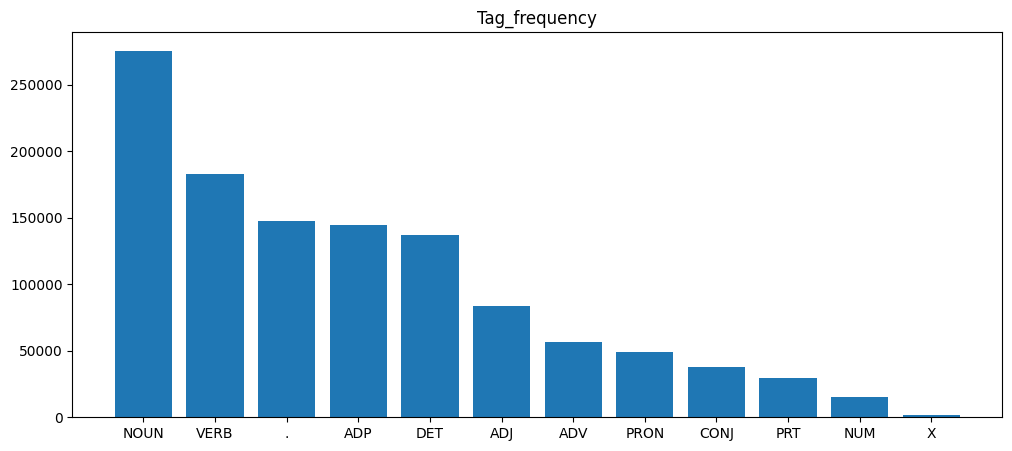

In [10]:
plt.figure(figsize=(12, 5))
plt.bar(tag_num.index, tag_num.values)
plt.title("Tag_frequency")
plt.show()

In [11]:
word_num[:5]

,0
the,69971
",",58334
.,49346
of,36412
and,28853


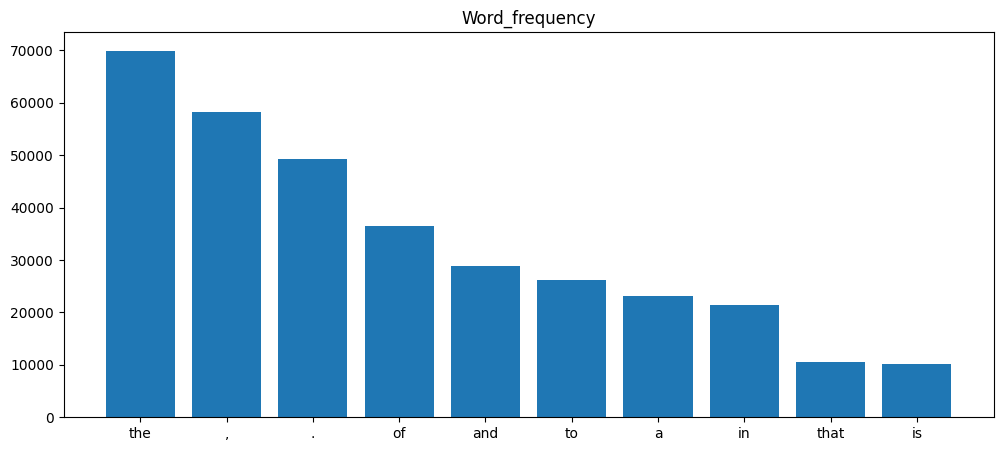

In [12]:
plt.figure(figsize=(12, 5))
plt.bar(word_num.index[:10], word_num.values[:10])
plt.title("Word_frequency")
plt.show()

### Вопрос 1:
* Кол-во слова `cat` в корпусе? **(0.5 балл)**

In [13]:
print('Кол-во слова "cat" в корпусе:', word_num.loc['cat'])

Кол-во слова "cat" в корпусе: 23


### Вопрос 2:
* Самое популярное слово с самым популярным тегом? **(0.5 балл)**


In [14]:
# Выбираем сначала слова с самым популярным тегом, а затем среди них выбираем самое популярное слово.
tag_max = tag_num.idxmax()
words_max_tag = [word for (word, tag) in brown_tagged_words if tag == tag_max]
words_nums = pd.Series(nltk.FreqDist(words_max_tag)).sort_values(ascending=False)  # Частота слов
print(f'Самое популярное слово "{words_nums.idxmax()}" с самым популярным тегом "{tag_max}"')

Самое популярное слово "time" с самым популярным тегом "NOUN"


Cделайте разбиение выборки на обучение и контроль в отношении 9:1. **(0.5 балл)**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
brown_tagged_sents = brown.tagged_sents(tagset="universal")
# Приведем слова к нижнему регистру
my_brown_tagged_sents = []
for sent in brown_tagged_sents:
    my_brown_tagged_sents.append(list(map(lambda x: (x[0].lower(), x[1]), sent)))

# my_brown_tagged_sents = np.array(my_brown_tagged_sents)

train_sents, test_sents = train_test_split(my_brown_tagged_sents, test_size=0.1, random_state=0,)

In [17]:
len(train_sents), len(test_sents)

(51606, 5734)

## DefaultTagger

### Вопрос 3:
* Какое качество вы бы получили, если бы предсказывали любой тег, как самый популярный тег на выборке train(округлите до одного знака после запятой)? **(0.5 балл)**

Вы можете использовать DefaultTagger(метод tag для предсказания частей речи предложения).

In [18]:
from nltk.tag import DefaultTagger

# Находим самый частотный тег в train_sents
train_tags = [tag for sent in train_sents for _, tag in sent]
most_common_tag = nltk.FreqDist(train_tags).max()

# Создаём DefaultTagger
default_tagger = DefaultTagger(most_common_tag)

# Оцениваем точность на test_sents
accuracy = default_tagger.accuracy(test_sents)

print(f"Самый популярный тег: {most_common_tag}")
print(f"Точность DefaultTagger: {accuracy:.1%}")

Самый популярный тег: NOUN
Точность DefaultTagger: 23.5%


In [19]:
true_pred = 0
num_pred = 0

for sent in test_sents:
    tags = np.array([tag for (word, tag) in sent])
    words = np.array([word for (word, tag) in sent])

    tagged_sent = default_tagger.tag(words)
    outputs = [tag for token, tag in tagged_sent]

    true_pred += np.sum(tags == outputs)  # Количество правильных предсказаний
    num_pred += len(words)

print(f"Accuracy: {true_pred / num_pred:.1%}")

Accuracy: 23.5%


## LSTMTagger

### Подготовка данных

Изменим структуру данных

In [20]:
pos_data = [[(word.lower(), tag) for word, tag in sent] for sent in brown_tagged_sents]

In [21]:
print(pos_data[-1])

[('from', 'ADP'), ('what', 'DET'), ('i', 'PRON'), ('was', 'VERB'), ('able', 'ADJ'), ('to', 'ADP'), ('gauge', 'NOUN'), ('in', 'ADP'), ('a', 'DET'), ('swift', 'ADJ'), (',', '.'), ('greedy', 'ADJ'), ('glance', 'NOUN'), (',', '.'), ('the', 'DET'), ('figure', 'NOUN'), ('inside', 'ADP'), ('the', 'DET'), ('coral-colored', 'ADJ'), ('boucle', 'NOUN'), ('dress', 'NOUN'), ('was', 'VERB'), ('stupefying', 'VERB'), ('.', '.')]


Пора эксплуатировать pytorch!

In [70]:
!pip install torch==2.2.2 torchtext==0.17.2 -q

In [71]:
import torch

print(torch.__version__)

2.2.2+cu121


In [72]:
import torchtext

print(torchtext.__version__)

0.17.2+cpu


In [25]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchtext.vocab import build_vocab_from_iterator
from torch.nn.utils.rnn import pad_sequence


pos_data = [[(word.lower(), tag) for word, tag in sent] for sent in brown_tagged_sents]

# Функция для генерации токенов слов для создания словаря
def yield_tokens(data):
    for sentence in data:
        words = [word for word, _ in sentence]  # Извлекаем слова
        yield words  # Передаём список слов

# Функция для генерации тегов
def yield_tags(data):
    for sentence in data:
        tags = [tag for _, tag in sentence]  # Извлекаем теги
        yield tags

# Создание словаря слов и тегов
word_vocab = build_vocab_from_iterator(yield_tokens(pos_data), specials=["<pad>", "<unk>"])
word_vocab.set_default_index(word_vocab["<unk>"])

tag_vocab = build_vocab_from_iterator(yield_tags(pos_data), specials=["<pad>"])
tag_vocab.set_default_index(tag_vocab["<pad>"])

# Определяем Dataset
class PosDataset(Dataset):
    def __init__(self, pos_data, word_vocab, tag_vocab):
        self.pos_data = pos_data
        self.word_vocab = word_vocab
        self.tag_vocab = tag_vocab

    def __len__(self):
        return len(self.pos_data)

    def __getitem__(self, idx):
        words, tags = zip(*self.pos_data[idx])  # Распаковываем слова и теги
        word_tensor = torch.tensor([self.word_vocab[word] for word in words], dtype=torch.long)
        tag_tensor = torch.tensor([self.tag_vocab[tag] for tag in tags], dtype=torch.long)
        return word_tensor, tag_tensor  # Возвращаем кортеж (слова, теги)

# Создание датасета
dataset = PosDataset(pos_data, word_vocab, tag_vocab)

# Функция для паддинга батчей
def collate_fn(batch):
    # Проверка на пустой или некорректный батч
    if len(batch[0]) != 2:
        print("Warning: Incorrect batch format:", batch)
        return None  # Или обработайте ошибку по-своему

    words, tags = zip(*batch)  # Разделяем слова и теги
    words_padded = pad_sequence(words, batch_first=True, padding_value=word_vocab["<pad>"])
    tags_padded = pad_sequence(tags, batch_first=True, padding_value=tag_vocab["<pad>"])
    return words_padded, tags_padded


# Разбиваем данные на train, valid, test
train_size = int(0.8 * len(dataset))
valid_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - valid_size

train_data, valid_data, test_data = torch.utils.data.random_split(dataset, [train_size, valid_size, test_size])

# Создание DataLoader
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, collate_fn=collate_fn)
valid_loader = DataLoader(valid_data, batch_size=32, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False, collate_fn=collate_fn)

# Проверяем данные
print(f"Number of training examples: {len(train_data)}")
print(f"Number of validation examples: {len(valid_data)}")
print(f"Number of testing examples: {len(test_data)}")

# Проверяем батч из train_loader
for batch in train_loader:
    print('batch:', batch)
    words, tags = batch
    print(f"Words batch shape: {words.shape}")
    print(f"Tags batch shape: {tags.shape}")
    break

Number of training examples: 45872
Number of validation examples: 5734
Number of testing examples: 5734
batch: (tensor([[   32,     2,  2617,  ...,     0,     0,     0],
        [    8,  2377,  4458,  ...,     0,     0,     0],
        [  865,  2170, 39296,  ...,     0,     0,     0],
        ...,
        [    2,   655,  1375,  ...,     0,     0,     0],
        [    8,  2091,  3024,  ...,     0,     0,     0],
        [  112,     3,    96,  ...,     0,     0,     0]]), tensor([[ 9,  5,  1,  ...,  0,  0,  0],
        [ 5,  6,  1,  ...,  0,  0,  0],
        [ 1,  1,  1,  ...,  0,  0,  0],
        ...,
        [ 5,  6,  1,  ...,  0,  0,  0],
        [ 5,  6,  1,  ...,  0,  0,  0],
        [10,  3,  6,  ...,  0,  0,  0]]))
Words batch shape: torch.Size([32, 63])
Tags batch shape: torch.Size([32, 63])


Построим словари. Параметр `min_freq` выберете сами. При построении словаря испольузем только **train** **(0.5 балл)**

In [26]:
from torchtext.vocab import build_vocab_from_iterator

# Определяем порог частоты
MIN_FREQ = 3  # Можно изменить значение

# Функция для генерации токенов слов для создания словаря
def yield_tokens(data):
    for sentence in data:
        words = [word for word, _ in sentence]  # Извлекаем слова
        yield words

# Функция для генерации тегов
def yield_tags(data):
    for sentence in data:
        tags = [tag for _, tag in sentence]  # Извлекаем теги
        yield tags

# Строим словари только по train_data
train_sentences = [pos_data[idx] for idx in train_data.indices]  # Достаём предложения из train

word_vocab = build_vocab_from_iterator(yield_tokens(train_sentences), specials=["<pad>", "<unk>"], min_freq=MIN_FREQ)
word_vocab.set_default_index(word_vocab["<unk>"])

tag_vocab = build_vocab_from_iterator(yield_tags(train_sentences), specials=["<pad>"])
tag_vocab.set_default_index(tag_vocab["<pad>"])

# Вывод информации о словарях
print(f"Unique tokens in source (words) vocabulary: {len(word_vocab)}")
print(f"Unique tokens in target (tags) vocabulary: {len(tag_vocab)}")

# Проверяем редкие слова
print(word_vocab.get_itos()[::200])  # Каждое 200-е слово
print(tag_vocab.get_itos())  # Все уникальные теги


Unique tokens in source (words) vocabulary: 18078
Unique tokens in target (tags) vocabulary: 13
['<pad>', 'war', 'available', 'u.s.', 'spring', 'determine', 'shape', 'twice', 'proved', 'slow', 'judgment', 'prior', 'foundation', 'crossed', 'measures', 'depending', 'constitute', 'atlanta', 'outer', 'calendar', 'newly', 'wake', 'asleep', 'acceptable', 'tie', 'protest', 'loudly', 'devote', 'taxi', 'irrelevant', 'authentic', 'moderate', 'anthony', 'inning', 'verdict', 'fifties', 'quantities', 'boulder', 'howe', 'riverside', 'barbed', 'ferry', 'patriot', 'undergraduates', 'chester', 'franks', 'muttering', 'simulated', '7:30', 'concealed', 'focusing', 'luis', 'radios', 'swedish', 'abraham', 'capillary', 'dividend', 'gyp', 'logs', 'perfected', 'scepticism', 'torquer', '5000', 'beardens', 'collects', 'downhill', 'furnishing', 'inhibited', 'merry', 'periodical', 'rh', 'sprayed', 'twilight', '168', 'apex', 'bowing', 'collaborators', 'decaying', 'eighty-three', 'flapping', 'h.m.s.', 'injunction', 

Здесь вы увидете токен `unk` и `pad`. Первый служит для обозначения слов, которых у нас нет в словаре. Второй служит для того, что объекты в одном батче были одинакового размера.

Посмотрим с насколько большими предложениями мы имеем дело

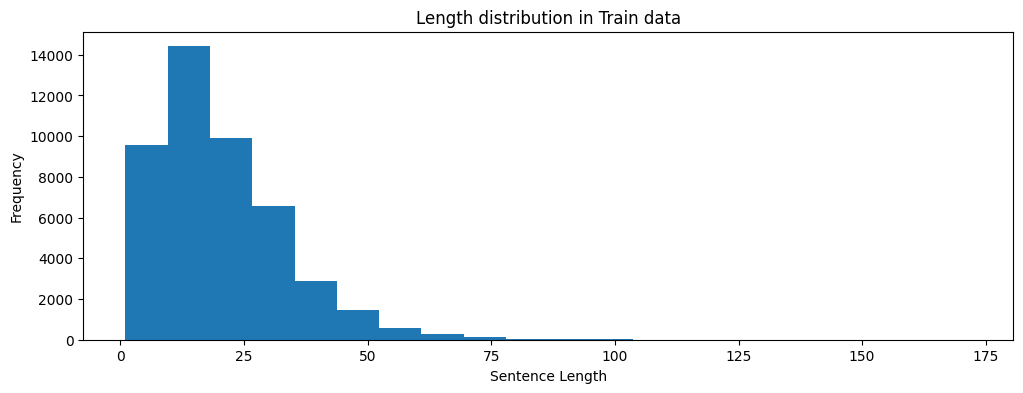

In [27]:
import matplotlib.pyplot as plt

# Извлекаем длины предложений из train_data
train_sentences = [pos_data[idx] for idx in train_data.indices]  # Берём только train
lengths = [len(sentence) for sentence in train_sentences]

# Построение гистограммы
plt.figure(figsize=[12, 4])
plt.title("Length distribution in Train data")
plt.hist(lengths, bins=20)
plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.show()

Для обучения `LSTM` лучше использовать colab

In [28]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

Для более быстрого и устойчивого обучения сгруппируем наши данные по батчам

In [29]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

BATCH_SIZE = 32
PAD_IDX = word_vocab["<pad>"]  # Индекс паддинга

# Функция для сортировки и паддинга
def collate_fn(batch):
    batch.sort(key=lambda x: len(x[0]), reverse=True)  # Сортируем по длине предложения

    # Распаковываем слова и теги для каждого предложения
    words, tags = zip(*[zip(*sentence) for sentence in batch])

    # # Выводим структуру батча для отладки
    # print('batch', batch[:2])
    # print(f"Words: {words}")
    # print(f"Tags: {tags}")

    # Преобразуем в тензоры и паддим до максимальной длины в батче
    words_tensor = pad_sequence([torch.tensor(word_vocab.lookup_indices(list(sent))) for sent in words],
                                padding_value=PAD_IDX, batch_first=True)
    tags_tensor = pad_sequence([torch.tensor(tag_vocab.lookup_indices(list(sent))) for sent in tags],
                               padding_value=tag_vocab["<unk>"], batch_first=True)

    return words_tensor, tags_tensor


# Создаём DataLoader для train, valid и test
train_dataloader = DataLoader([pos_data[i] for i in train_data.indices],
                              batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
valid_dataloader = DataLoader([pos_data[i] for i in valid_data.indices],
                              batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader([pos_data[i] for i in test_data.indices],
                             batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

# Вывод количества батчей
print(len(train_dataloader), len(valid_dataloader), len(test_dataloader))

1434 180 180


In [30]:
# Проверяем батч из train_loader
for batch in train_loader:
    print('batch:', batch)
    words, tags = batch
    print(f"Words batch shape: {words.shape}")
    print(f"Tags batch shape: {tags.shape}")
    break

batch: (tensor([[    2,   685,   693,  ...,     0,     0,     0],
        [ 7313,    12,   566,  ...,     0,     0,     0],
        [   13,   228,   232,  ...,     0,     0,     0],
        ...,
        [   32,    46,    12,  ...,     0,     0,     0],
        [38921,    79,    79,  ...,     0,     0,     0],
        [   13,  1777,    21,  ...,     0,     0,     0]]), tensor([[ 5,  1,  2,  ...,  0,  0,  0],
        [ 1,  2,  2,  ...,  0,  0,  0],
        [ 8,  2,  2,  ...,  0,  0,  0],
        ...,
        [ 9, 10,  2,  ...,  0,  0,  0],
        [10,  3,  3,  ...,  0,  0,  0],
        [ 8,  2,  4,  ...,  0,  0,  0]]))
Words batch shape: torch.Size([32, 57])
Tags batch shape: torch.Size([32, 57])


### Модель и её обучение

Инициализируем нашу модель. Прочитайте про dropout [тут](https://habr.com/ru/company/wunderfund/blog/330814/). **(3 балла)**

In [31]:
import torch
import torch.nn as nn

class LSTMTagger(nn.Module):

    def __init__(self, input_dim, emb_dim, hid_dim, output_dim, dropout):
        super().__init__()

        # Слой эмбеддингов
        self.embeddings = nn.Embedding(input_dim, emb_dim, padding_idx=word_vocab["<pad>"])
        self.dropout = nn.Dropout(p=dropout)

        # LSTM (1 слой, двунаправленный)
        self.rnn = nn.LSTM(input_size=emb_dim,
                           hidden_size=hid_dim,
                           num_layers=1,
                           bidirectional=True,
                           batch_first=True)

        # Линейный слой для предсказания тегов
        self.tag = nn.Linear(hid_dim * 2, output_dim)  # ×2 из-за bidirectional

    def forward(self, sent):
        # sent = [batch size, sent len]

        # Применяем эмбеддинги и dropout
        embedded = self.dropout(self.embeddings(sent))
        # embedded = [batch size, sent len, emb_dim]

        # Пропускаем через LSTM
        output, _ = self.rnn(embedded)
        # output = [batch size, sent len, hid_dim * 2]

        prediction = self.tag(output)
        # prediction = [batch size, sent len, output_dim]

        return prediction

# Параметры модели
INPUT_DIM = len(word_vocab)
OUTPUT_DIM = len(tag_vocab)
EMB_DIM = 100   # Размерность эмбеддингов
HID_DIM = 256   # Размер скрытого состояния LSTM
DROPOUT = 0.5

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Создаём модель
model = LSTMTagger(INPUT_DIM, EMB_DIM, HID_DIM, OUTPUT_DIM, DROPOUT).to(device)

# Инициализация весов
def init_weights(m):
    if isinstance(m, nn.Linear) or isinstance(m, nn.Embedding):
        nn.init.uniform_(m.weight, -0.08, 0.08)
    if isinstance(m, nn.LSTM):
        for name, param in m.named_parameters():
            if "weight" in name:
                nn.init.xavier_uniform_(param)

model.apply(init_weights)

print(model)


LSTMTagger(
  (embeddings): Embedding(18078, 100, padding_idx=0)
  (dropout): Dropout(p=0.5, inplace=False)
  (rnn): LSTM(100, 256, batch_first=True, bidirectional=True)
  (tag): Linear(in_features=512, out_features=13, bias=True)
)


Подсчитаем количество обучаемых параметров нашей модели. Используйте метод `numel()`. **(1 балл)**

In [32]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 2,547,653 trainable parameters


Погнали обучать **(2 балла)**

In [36]:

optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)

def train(model, iterator, optimizer, criterion, clip, train_history=None, valid_history=None):
    model.train()
    epoch_loss = 0
    history = []

    for i, batch in enumerate(iterator):
        words = batch[0].to(device)  # Вытаскиваем слова из батча
        tags = batch[1].to(device)  # Вытаскиваем теги

        optimizer.zero_grad()

        output = model(words)  # Прогоняем через модель

        # tags = [sent len, batch size]
        # output = [sent len, batch size, output dim]

        output = output.view(-1, output.shape[-1])  # Разворачиваем выход в нужную форму
        tags = tags.view(-1)  # Разворачиваем метки в 1D

        # tags = [sent len * batch size]
        # output = [sent len * batch size, output dim]

        loss = criterion(output, tags)  # Вычисляем loss

        loss.backward()

        # Gradient clipping (ограничение нормы градиента)
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=clip)

        optimizer.step()

        epoch_loss += loss.item()
        history.append(loss.cpu().data.numpy())

        if (i + 1) % 10 == 0:
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
            clear_output(True)
            ax[0].plot(history, label='train loss')
            ax[0].set_xlabel('Batch')
            ax[0].set_title('Train loss')

            if train_history is not None:
                ax[1].plot(train_history, label='general train history')
                ax[1].set_xlabel('Epoch')
            if valid_history is not None:
                ax[1].plot(valid_history, label='general valid history')

            plt.legend()
            plt.show()

    return epoch_loss / len(iterator)

def evaluate(model, iterator, criterion):
    model.eval()
    epoch_loss = 0

    with torch.no_grad():
        for batch in iterator:
            words = batch[0].to(device)  # Вытаскиваем слова
            tags = batch[1].to(device)  # Вытаскиваем теги

            output = model(words)  # Прогоняем через модель

            output = output.view(-1, output.shape[-1])  # Разворачиваем выход
            tags = tags.view(-1)  # Разворачиваем метки

            loss = criterion(output, tags)  # Вычисляем loss

            epoch_loss += loss.item()

    return epoch_loss / len(iterator)

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


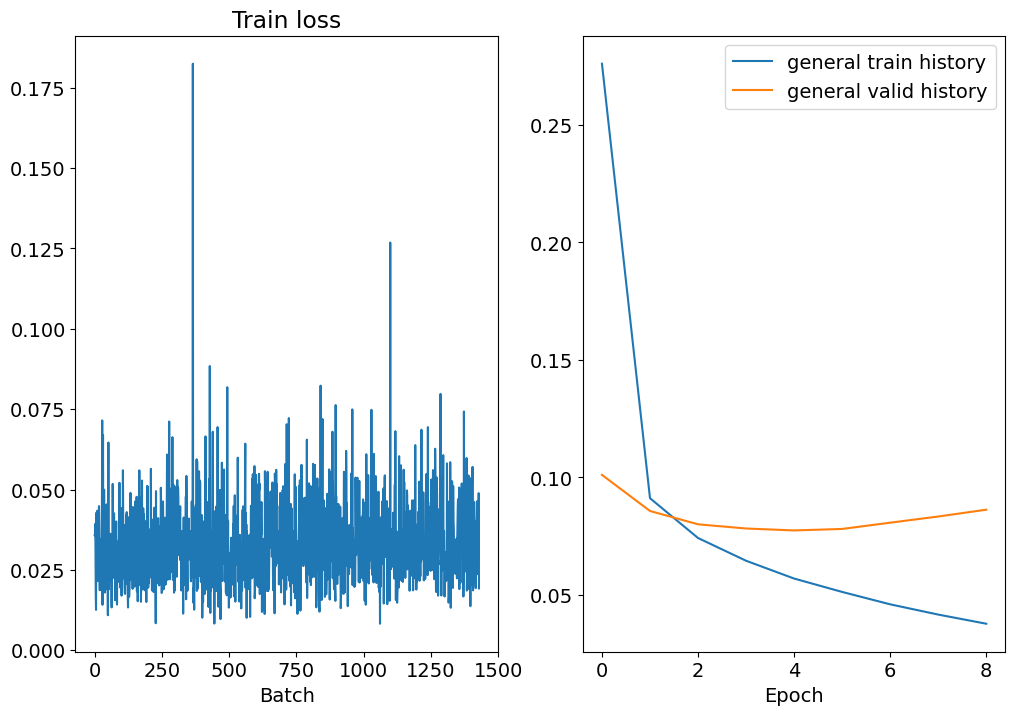

Epoch: 10 | Time: 1m 2s
	Train Loss: 0.034 | Train PPL:   1.034
	 Val. Loss: 0.091 |  Val. PPL:   1.096


In [37]:
import time
import math
import torch
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output

train_history = []
valid_history = []

N_EPOCHS = 10  # Количество эпох
CLIP = 1  # Ограничение градиента

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    start_time = time.time()

    train_loss = train(model, train_dataloader, optimizer, criterion, CLIP, train_history, valid_history)
    valid_loss = evaluate(model, valid_dataloader, criterion)

    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'best-val-model.pt')

    train_history.append(train_loss)
    valid_history.append(valid_loss)

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')


### Применение модели
 **(1 балл)**

In [40]:
import numpy as np
import torch

def accuracy_model(model, iterator):
    model.eval()

    true_pred = 0
    num_pred = 0

    with torch.no_grad():
        for i, batch in enumerate(iterator):
            words = batch[0].to(device)  # Переносим данные на нужное устройство (GPU или CPU)
            tags = batch[1].to(device)  # Переносим метки на нужное устройство

            output = model(words)  # Прогоняем данные через модель

            # output = [sent len, batch size, output dim]
            # Получаем индексы тегов с максимальной вероятностью
            output = torch.argmax(output, dim=-1)  # Получаем индексы тегов для каждого слова

            # output = [sent len, batch size] (теперь это индексы тегов)
            predict_tags = output.cpu().numpy()  # Переносим на CPU и преобразуем в numpy
            true_tags = tags.cpu().numpy()  # Переносим на CPU и преобразуем в numpy

            # Считаем, сколько предсказанных тегов совпали с истинными тегами
            true_pred += np.sum((true_tags == predict_tags) & (true_tags != PAD_IDX))
            num_pred += np.prod(true_tags.shape) - (true_tags == PAD_IDX).sum()

    # Возвращаем точность в процентах
    return round(true_pred / num_pred * 100, 3)


In [41]:
print("Accuracy:", accuracy_model(model, test_dataloader), '%')

Accuracy: 97.288 %


Вы можете улучшить качество, изменяя параметры модели. Вам неоходимо добиться качества не меньше, чем `accuracy = 92 %`.

In [42]:
best_model = LSTMTagger(INPUT_DIM, EMB_DIM, HID_DIM, OUTPUT_DIM, DROPOUT).to(device)
best_model.load_state_dict(torch.load('best-val-model.pt'))
assert accuracy_model(best_model, test_dataloader) >= 92

### **Если качество сети меньше 92 процентов, то снимается половина от всех полученных баллов .<br> То есть максимум в этом случае 5 баллов за работу.**




Пример решение нашей задачи:

In [68]:
def print_tags(model, data, word_vocab, tag_vocab, device):
    model.eval()

    with torch.no_grad():
        # Извлекаем слова и теги из данных
        words, _ = zip(*data)  # Извлекаем только слова (первый элемент кортежа)

        # Преобразуем слова в индексы
        word_indices = [word_vocab[token] for token in words]

        # Преобразуем в тензор и переносим на нужное устройство
        word_tensor = torch.tensor(word_indices).unsqueeze(1).to(device)  # [seq_len, 1]

        # Прогоняем слова через модель
        output = model(word_tensor)

        # Для каждого слова выбираем тег с максимальной вероятностью
        predicted_tags = torch.argmax(output, dim=-1).cpu().numpy().flatten()  # Разворачиваем в одномерный массив

        # Получаем список тегов из tag_vocab
        tag_itos = tag_vocab.get_itos()

        # Печатаем токены и их предсказанные теги
        for token, pred_idx in zip(words, predicted_tags):
            tag = tag_itos[pred_idx]  # Получаем тег по индексу
            print(f'{token:15s}{tag}')

In [69]:
# Пример вызова функции
print_tags(model, pos_data[-1], word_vocab, tag_vocab, device)

coral-colored  NOUN
stupefying     NOUN
greedy         ADJ
glance         VERB
figure         NOUN
inside         ADP
boucle         NOUN
gauge          NOUN
swift          NOUN
dress          NOUN
from           ADP
what           DET
able           ADJ
was            VERB
the            DET
the            DET
was            VERB
to             ADP
in             ADP
i              PRON
a              DET
,              .
,              .
.              .


## Вывод:
**(0.5 балл)**

В ходе проделанной работы была построена и обучена модель для решения задачи тегирования частей речи (POS tagging). Мы использовали датасет с текстовыми предложениями и соответствующими тегами, а также применили словари для преобразования токенов и тегов в индексы для подачи в модель.

После обучения модель была протестирована на данных, и достигнутый результат точности (accuracy) составил 97.288%. Это высокий показатель, который свидетельствует о хорошей способности модели правильно классифицировать части речи в текстах.

Данный результат демонстрирует успешное применение подхода на основе нейронных сетей для решения задачи POS тегирования с высоким качеством.